In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
# Set variables
mu = 1500
sigma = 100
n = 9
sample_mean = 1600
sample_deviation = 30

X = np.array([10, 14, 16, 20, 12, 11])
y = np.array([25, 28, 42, 28, 32, 28])
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [3]:
# T Test
print("T-Test")
print("H0: Mean breaking strength of the cables supplied is 1500.")
print("H1: Mean breaking strength of the cables supplied is not 1500.")

t = (sample_mean - mu)/(sample_deviation/np.sqrt(n))
print("t: ", t)

# Compare with the critical t-value
# Degrees of freedom
df = n-1

print("\nHypothesis with 1% Level of Significance: ")
# For 1% level of significance
level_of_significance = 1/100

# As this is a two tailed test we need to devide it by 2
probability = 1 - (level_of_significance/2)
t_criteria = stats.t.ppf(probability, df)
print("t_criteria: ", t_criteria)

if -t_criteria < t < t_criteria:
    print("Null Hypothesis(H0) is accepted. So, Company's claim is true.")
else:
    print("Null Hypothesis(H0) is rejected. So, Company's claim is not true.")

print("\nHypothesis with 5% Level of Significance: ")
# For 5% level of significance
level_of_significance = 5/100

# As this is a two tailed test we need to devide it by 2
probability = 1 - (level_of_significance/2)
t_criteria = stats.t.ppf(probability, df)

print("t_criteria: ", t_criteria)

if -t_criteria < t < t_criteria:
    print("Null Hypothesis(H0) is accepted. So, Company's claim is true.")
else:
    print("Null Hypothesis(H0) is rejected. So, Company's claim is not true.")

T-Test
H0: Mean breaking strength of the cables supplied is 1500.
H1: Mean breaking strength of the cables supplied is not 1500.
t:  10.0

Hypothesis with 1% Level of Significance: 
t_criteria:  3.3553873313333957
Null Hypothesis(H0) is rejected. So, Company's claim is not true.

Hypothesis with 5% Level of Significance: 
t_criteria:  2.3060041350333704
Null Hypothesis(H0) is rejected. So, Company's claim is not true.


In [4]:
# Z Test
print("Z-Test")
print("H0: Mean breaking strength of the cables supplied is 1500.")
print("H1: Mean breaking strength of the cables supplied is not 1500.")

z = (sample_mean - mu)/(sigma/np.sqrt(n))

print("z: ", z)

print("\nHypothesis with 1% Level of Significance: ")
# For 1% level of significance
level_of_significance = 1/100

# As this is a two tailed test we need to devide it by 2
probability = 1 - (level_of_significance/2)
z_criteria = stats.norm.ppf(probability)

print("z_criteria: ", z_criteria)

if -z_criteria < z < z_criteria:
    print("Null Hypothesis(H0) is accepted. So, Company's claim is true.")
else:
    print("Null Hypothesis(H0) is rejected. So, Company's claim is not true.")


print("\nHypothesis with 5% Level of Significance: ")
# For 5% level of significance
level_of_significance = 5/100

# As this is a two tailed test we need to devide it by 2
probability = 1 - (level_of_significance/2)
z_criteria = stats.norm.ppf(probability)

print("z_criteria: ", z_criteria)

if -z_criteria < z < z_criteria:
    print("Null Hypothesis(H0) is accepted. So, Company's claim is true.")
else:
    print("Null Hypothesis(H0) is rejected. So, Company's claim is not true.")

Z-Test
H0: Mean breaking strength of the cables supplied is 1500.
H1: Mean breaking strength of the cables supplied is not 1500.
z:  3.0

Hypothesis with 1% Level of Significance: 
z_criteria:  2.5758293035489004
Null Hypothesis(H0) is rejected. So, Company's claim is not true.

Hypothesis with 5% Level of Significance: 
z_criteria:  1.959963984540054
Null Hypothesis(H0) is rejected. So, Company's claim is not true.


Score:  0.09423306569198599
y_pred:  [[28.57869249]
 [30.58353511]
 [31.58595642]
 [33.59079903]
 [29.5811138 ]
 [29.07990315]]
y_pred:  [[0.50121065]]
u:  166.20823244552057
v:  183.5
r2:  0.09423306569198597


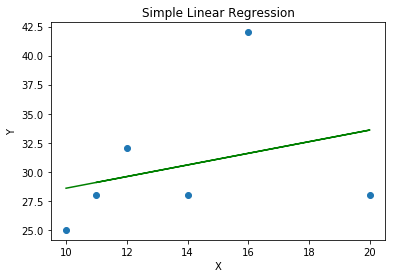

In [5]:
# Linear Regression
linear_regression = LinearRegression()

linear_regression.fit(X, y)

print("Score: ", linear_regression.score(X, y))

y_pred = linear_regression.predict(X)

coef = linear_regression.coef_

print("y_pred: ", y_pred)
print("y_pred: ", coef)

u = ((y - y_pred) ** 2).sum()
v = ((y - y.mean()) ** 2).sum()
r2 = (1 - u/v)

print("u: ", u)
print("v: ", v)
print("r2: ", r2)


plt.scatter(X, y)
plt.plot(X, linear_regression.predict(X), color='green')
plt.title("Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Score:  0.5210133952208141
y_pred:  [[24.20954638]
 [34.85477319]
 [35.84495599]
 [29.16046039]
 [30.97630332]
 [27.95396073]]
coef:  [[ 0.         11.32616791 -0.36103588]]
intercept:  [-52.94854435]
u:  87.8940419769806
v:  183.5
r2:  0.5210133952208141


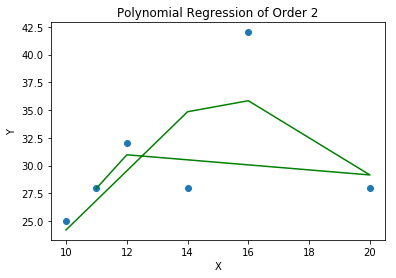

In [6]:
# Polynomial Regression with degree 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
linear_regression = LinearRegression()

linear_regression.fit(X_poly, y)

print("Score: ", linear_regression.score(X_poly, y))

y_pred = linear_regression.predict(X_poly)

coef = linear_regression.coef_
intercept = linear_regression.intercept_

print("y_pred: ", y_pred)
print("coef: ", coef)
print("intercept: ", intercept)

u = ((y - y_pred) ** 2).sum()
v = ((y - y.mean()) ** 2).sum()
r2 = (1 - u/v)

print("u: ", u)
print("v: ", v)
print("r2: ", r2)

plt.scatter(X, y)
plt.plot(X, linear_regression.predict(poly.fit_transform(X)), color='green')
plt.title("Polynomial Regression of Order 2")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

Score:  0.6567610746577988
y_pred:  [[26.6642111 ]
 [33.98597721]
 [38.89025748]
 [28.31875785]
 [28.38617145]
 [26.75462491]]
coef:  [[  0.         -50.58231873   3.91475886  -0.09527856]]
intercept:  [236.29007272]
u:  62.98434280029393
v:  183.5
r2:  0.6567610746577988


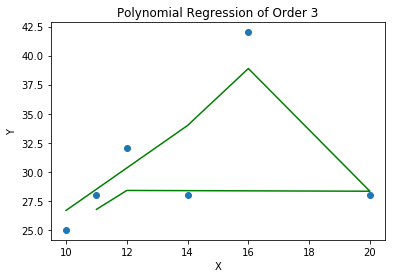

In [7]:
# Polynomial Regression with degree 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

poly.fit(X_poly, y)
linear_regression = LinearRegression()

linear_regression.fit(X_poly, y)

print("Score: ", linear_regression.score(X_poly, y))

y_pred = linear_regression.predict(X_poly)

coef = linear_regression.coef_
intercept = linear_regression.intercept_

print("y_pred: ", y_pred)
print("coef: ", coef)
print("intercept: ", intercept)

u = ((y - y_pred) ** 2).sum()
v = ((y - y.mean()) ** 2).sum()
r2 = (1 - u/v)

print("u: ", u)
print("v: ", v)
print("r2: ", r2)

plt.scatter(X, y)
plt.plot(X, linear_regression.predict(poly.fit_transform(X)), color='green')
plt.title("Polynomial Regression of Order 3")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()